# Importing Libraries

In [4]:
## To process the data
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from io import StringIO
import string

## For stemming words in required columns
import nltk
from nltk.stem.porter import PorterStemmer

## Metric
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

## For fetching movie posters
import requests
from io import BytesIO
from PIL import Image
import matplotlib.image as mpimg

# Reading Datasets

In [5]:
# Importing the movies dataset
movies = pd.read_csv("tmdb_5000_movies.csv")

# Importing the credits dataset
credits = pd.read_csv("tmdb_5000_credits.csv")

# Data Exploration

In [6]:
# Fetching the first five rows of movies
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
# Fetching the first five rows of credits
credits.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
# Dimensions of movies
movies.shape

(4803, 20)

In [9]:
# Dimensions of credits
credits.shape

(4803, 4)

In [10]:
# Merging movies and credits into one DataFrame
movies = movies.merge(credits, left_on = 'id', right_on = 'movie_id')

In [11]:
# Fetching the first five rows of the new DataFrame
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
# Dimensions of new Data movies
movies.shape

(4803, 24)

In [13]:
# Fetching the summary of the DataFrame
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [14]:
# Fetching statistical information for each column (except for column with dtype "object")
# Transposed for readability
np.round(movies.drop(["id", 'movie_id'], axis = 1).select_dtypes(exclude=['object']).describe().transpose(),3)

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.000,1.500000e+07,4.000000e+07,3.800000e+08
popularity,4803.0,2.149200e+01,3.181700e+01,0.0,4.668,1.292200e+01,2.831400e+01,8.755810e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068760e+02,2.261200e+01,0.0,94.000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092000e+00,1.195000e+00,0.0,5.600,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.000,2.350000e+02,7.370000e+02,1.375200e+04


In [15]:
# Fetching number of NULL values for each column
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64

# Data Pre-Processing

In [16]:
# Taking only selected columns which will help us recommend movies like movie_id, tilte, genre, overview, keywords, cast and crew
movies = movies[['movie_id', 'title_x', 'genres', 'overview', 'keywords', 'cast', 'crew']].rename(columns = {'title_x':'title'})

In [17]:
# Fetching the head of the new movies dataframe
movies.head(5)

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","Captain Barbossa, long believed to be dead, ha...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",A cryptic message from Bond’s past sends him o...,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Following the death of District Attorney Harve...,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","John Carter is a war-weary, former military ca...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [18]:
# Fetching number of NULL values for each column
movies.isnull().sum()

movie_id    0
title       0
genres      0
overview    3
keywords    0
cast        0
crew        0
dtype: int64

In [19]:
# Removing rows that have `NULL` values in the overview column
movies.dropna(inplace=True)

In [20]:
# Checking NULL values AGAIN
movies.isnull().sum()

movie_id    0
title       0
genres      0
overview    0
keywords    0
cast        0
crew        0
dtype: int64

In [21]:
# Checking duplicate data
movies.duplicated().sum()

0

In [22]:
# Observing Genres column
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [23]:
# Module which help in converting string of list to list
import ast

# Defining function for converting this string of list into string like ['Action, 'Adventure', 'Fantasy', 'Science Fiction']
def convert(obj):
    list = [] # Defining list for returning genres
    for i in ast.literal_eval(obj): # Converts in obj in list
        list.append(i['name'])
    return list

In [24]:
# Checking genres column
movies['genres'].apply(convert)

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4800, dtype: object

In [25]:
# Updating genre column
movies['genres'] = movies['genres'].apply(convert)
movies.head()

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [26]:
# Similarily for Keywords
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [27]:
# Defining function to select first 3 actors from cast
def convert3(obj):
    list = [] # Defining list for returning actors
    count = 0 # For keeping count
    for i in ast.literal_eval(obj): # Converts in obj in list
        if count != 3:
            list.append(i['name'])
            count+=1
        else:
            break
    return list

In [28]:
# Checking cast column
movies['cast'].apply(convert3)

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4798    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4799         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4800           [Eric Mabius, Kristin Booth, Crystal Lowe]
4801            [Daniel Henney, Eliza Coupe, Bill Paxton]
4802    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4800, dtype: object

In [29]:
# Updating genre column
movies['cast'] = movies['cast'].apply(convert)
movies.head()

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [30]:
# Observing Crew column
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [31]:
# Defining function to pick director from crew column
def fetch_director(obj):
    list = [] # Defining list for returning director
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            list.append(i['name'])
            break
    return list

In [32]:
movies['crew'].apply(fetch_director)

0           [James Cameron]
1          [Gore Verbinski]
2              [Sam Mendes]
3       [Christopher Nolan]
4          [Andrew Stanton]
               ...         
4798     [Robert Rodriguez]
4799         [Edward Burns]
4800          [Scott Smith]
4801          [Daniel Hsia]
4802     [Brian Herzlinger]
Name: crew, Length: 4800, dtype: object

In [33]:
# Updating crew column
movies['crew'] = movies['crew'].apply(fetch_director)
movies.head()

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


In [34]:
# Converting overview column to list using lambda function
movies['overview'].apply(lambda x:x.split())

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4798    [El, Mariachi, just, wants, to, play, his, gui...
4799    [A, newlywed, couple's, honeymoon, is, upended...
4800    ["Signed,, Sealed,, Delivered", introduces, a,...
4801    [When, ambitious, New, York, attorney, Sam, is...
4802    [Ever, since, the, second, grade, when, he, fi...
Name: overview, Length: 4800, dtype: object

In [35]:
# Updating overview column
movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies.head()

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[A, cryptic, message, from, Bond’s, past, send...","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Following, the, death, of, District, Attorney...","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[John, Carter, is, a, war-weary,, former, mili...","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


In [36]:
# Removing space from each word to treat it as one entity
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

movies.head()

,movie_id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[A, cryptic, message, from, Bond’s, past, send...","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Following, the, death, of, District, Attorney...","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan]
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[John, Carter, is, a, war-weary,, former, mili...","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton]


In [37]:
# Merging genres , overview, keywords, cast, crew to one column naming it as tags
movies['tags'] = movies['genres'] + movies['overview'] + movies['keywords'] + movies['cast'] + movies['crew']

# Removing all these column and replacing it by tags column
new_movies = movies[['movie_id', 'title', 'tags']]
new_movies.head()

,movie_id,title,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction, I..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action, Captain, Barbossa..."
2,206647,Spectre,"[Action, Adventure, Crime, A, cryptic, message..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller, Following, th..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction, John, Cart..."


In [38]:
# Converting tags column list into string using lambda function
new_movies['tags'] = new_movies['tags'].apply(lambda x:" ".join(x))
new_movies.head()

<ipython-input-38-488447c991f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies['tags'] = new_movies['tags'].apply(lambda x:" ".join(x))


,movie_id,title,tags
0,19995,Avatar,Action Adventure Fantasy ScienceFiction In the...
1,285,Pirates of the Caribbean: At World's End,"Adventure Fantasy Action Captain Barbossa, lon..."
2,206647,Spectre,Action Adventure Crime A cryptic message from ...
3,49026,The Dark Knight Rises,Action Crime Drama Thriller Following the deat...
4,49529,John Carter,Action Adventure ScienceFiction John Carter is...


In [39]:
new_movies['tags'][0]

'Action Adventure Fantasy ScienceFiction In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver StephenLang MichelleRodriguez GiovanniRibisi JoelDavidMoore CCHPounder WesStudi LazAlonso DileepRao MattGerald SeanAnthonyMoran JasonWhyte ScottLawrence KellyKilgour JamesPatrickPitt SeanPatrickMurphy PeterDillon KevinDorman KelsonHenderson DavidVanHorn JacobTomuri MichaelBlain-Rozgay JonCurry LukeHawker WoodySchultz PeterMensah SoniaYee JahnelCurfman IlramChoi KylaWarren LisaRoumain DebraWilson ChrisMala TaylorKibby JodieLandau JulieLamm CullenB.Madden JosephBradyMadden FrankieTorres AustinWilson SaraWilson TamicaWashington-Miller LucyBriant NathanM

In [40]:
# Converting letters to lower case
new_movies['tags'] = new_movies['tags'].apply(lambda x:x.lower())
new_movies.head()

<ipython-input-40-828037682c82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies['tags'] = new_movies['tags'].apply(lambda x:x.lower())


,movie_id,title,tags
0,19995,Avatar,action adventure fantasy sciencefiction in the...
1,285,Pirates of the Caribbean: At World's End,"adventure fantasy action captain barbossa, lon..."
2,206647,Spectre,action adventure crime a cryptic message from ...
3,49026,The Dark Knight Rises,action crime drama thriller following the deat...
4,49529,John Carter,action adventure sciencefiction john carter is...


# Model building using Vectorization

In [41]:
# Import CountVectorizer model from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# Considering most frequently occurred 5000 words and removing stop_words which are commonly used words like 'is', 'are', 'from', etc
cv = CountVectorizer(max_features=5000, stop_words='english')

In [42]:
# Fitting the text data and saving it
vectors = cv.fit_transform(new_movies['tags']).toarray()

In [43]:
# Observing vectors
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
#Dimension of Vectors
vectors.shape

(4800, 5000)

In [45]:
# Calculating similarities for each movie with others in the entire dataset using cosine distance
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(X = vectors)

In [46]:
similarity

array([[1.        , 0.07142857, 0.05143445, ..., 0.02326211, 0.02571722,
        0.        ],
       [0.07142857, 1.        , 0.07715167, ..., 0.02326211, 0.        ,
        0.        ],
       [0.05143445, 0.07715167, 1.        , ..., 0.02512595, 0.        ,
        0.        ],
       ...,
       [0.02326211, 0.02326211, 0.02512595, ..., 1.        , 0.07537784,
        0.05025189],
       [0.02571722, 0.        , 0.        , ..., 0.07537784, 1.        ,
        0.05555556],
       [0.        , 0.        , 0.        , ..., 0.05025189, 0.05555556,
        1.        ]])

In [48]:
similarity.shape

(4800, 4800)

In [72]:
# Defining function to get the indices of the top five most similar movies
def getRecommendedMovies(movie_title, metric = similarity):
    index_position = movies.query(f"title == '{movie_title}'").index[0]
    count = 0
    similar_movie_indices = []
    for i in range(metric[index_position].shape[0]):
        if metric[index_position][i] in np.sort(metric[index_position])[-6:-1]:
            count += 1
            if count < 6:
                # print(movies.title.iloc[i])
                similar_movie_indices.append(i)
    return similar_movie_indices

In [73]:
# Defining function to fetch movie posters from the official TMDb website using TMDb Developer API
def fetch_poster(movie_id, api = "6700d8b244e37ebf55d8ff2c605c02ce"):
    url = "https://api.themoviedb.org/3/movie/{}?api_key={}".format(movie_id, api)
    data = requests.get(url)
    data = data.json()
    poster_path = data['poster_path']
    full_path = "https://image.tmdb.org/t/p/w500/" + poster_path
    return full_path

In [75]:
# Defining function to fetch movies with posters
def plotMovieCovers(movie_list):
    # creating a grid of subplots with 2 rows and 1 column to display 5 movie posters in a row
    fig, axes = plt.subplots(1, 5, figsize = (25, 5), facecolor = '#1C1D20')
    for i in range(5):
        url = fetch_poster(movie_list[i])
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        # displaying movie posters on axes one by one
        axes[i].imshow(img)
        # hiding axis labels
        axes[i].axis('off');

In [76]:
# Defining function to get recommender movies with posters
def recommendMoviesWposters(title, metric = similarity):
    results = getRecommendedMovies(title)
    plotMovieCovers(movies.iloc[results]['movie_id'].to_list())

/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.themoviedb.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.tmdb.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.themoviedb.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unveri

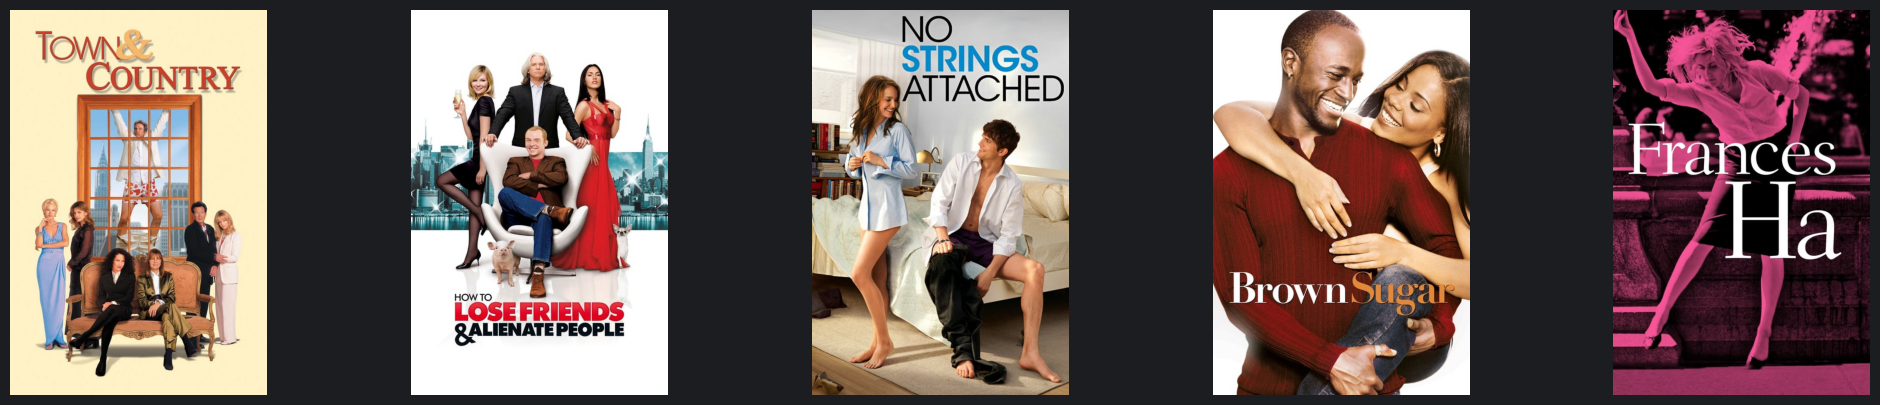

In [77]:
# Fetching recommended movies for a popular title called `Friends with Benefits` which is romantic comedy
recommendMoviesWposters('Friends with Benefits')

/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.themoviedb.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.tmdb.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.themoviedb.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unveri

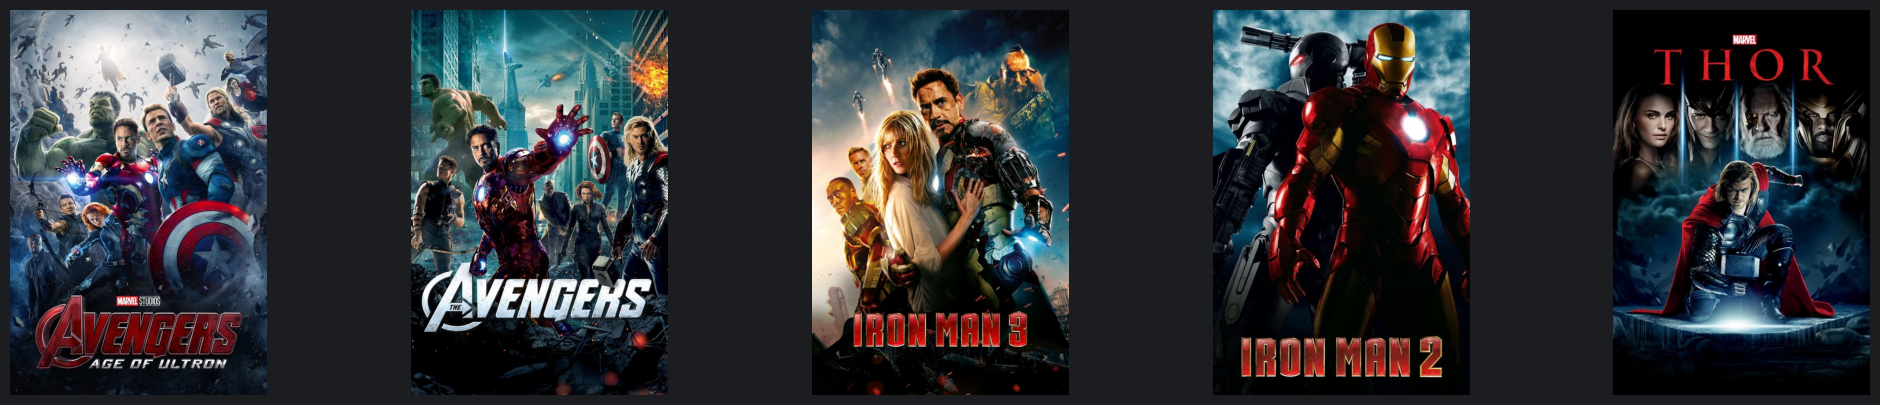

In [78]:
# Fetching recommended movies for a popular title called `Iron Man` which is the pioneer of MCU Infinity Saga
recommendMoviesWposters("Iron Man")

/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.themoviedb.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'image.tmdb.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.themoviedb.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unveri

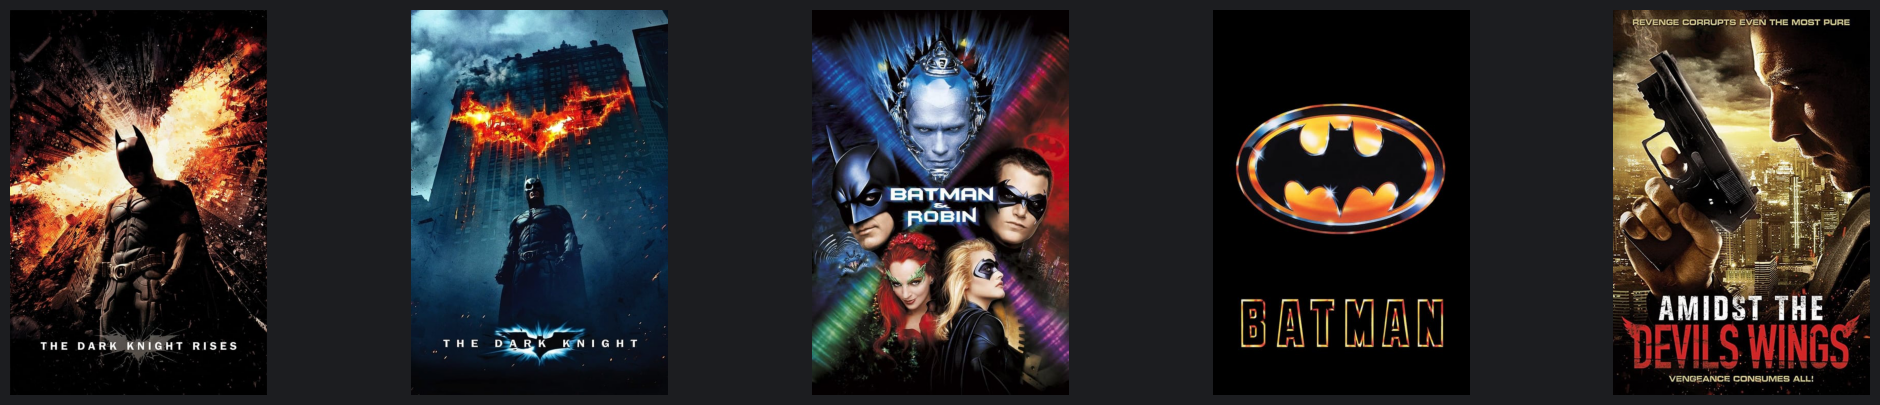

In [79]:
# Fetching recommended movies for a popular title called `Batman Begin` which is the first movie of Dark Knight Trilogy by Christopher Nolan
recommendMoviesWposters("Batman Begins")